# Inerciální a neinerciální soustavy

volný hmotný bod = bod, na který nepůsobí tyto síly
### Inerciální vztažná soustava ### 
- Soustava vůči které je volný hmozný bod v klidu nebo rovnoměrně přímočarém pohybu
- Máme-li tři, s rozumnou přesností, volné body, můžeme s nimi spojit inerciální souřadnicovou soustavu
- Galileova soustava: Střed ve Slunci, osy ke stálicím
- Laboratorní soustava - spojená se zemí
    - v této soustavě  máme pevně danou rychlost otáčení na povrchu Země rovnou $v =0,46 km/s$, poloměr Země je $r=6378 km$ => v této soustavě tedy působí určité dostředivé zrychlení 

# Rovnoměrně zrychlený pohyb
Odvození Newtonových rovnic.
\
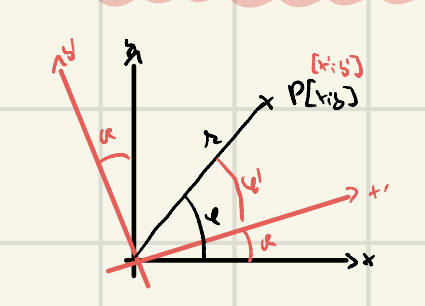
\
V karteziánských souřadnicích:
$$
x' = xcos(\theta) + ysin(\theta)
$$

$$
y' = ycos(\theta) - xsin(\theta)
$$
Takto zvolená otočená soustava se otočila o úhel $\theta$. 
\
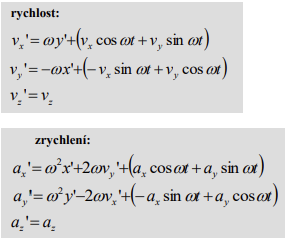
\
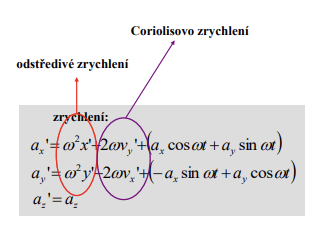

U nerovnoměrně zrychleného pohybu máme ještě Eulerovo zrychlení navíc.

Člověku na kolotoči se zdá, že na něj působí nějaká síla, která ho udržuje uvnitř kola, protože jinak by přece vletěl dovnitř. Z pohledu vnějšího pozorovatele se jen otáčí.

Pozn.: Členy $y'$ a $x'$ v první derivaci jsou zde proto, že 
$$
y' = -sin(\omega t) + cos(\omega t) 
$$

$$
v_x' = v_x cos(\omega t) + v_y sin(\omega t)  \pmb{- xsin(\omega t) + ycos(\omega t)}
$$
Analogicky potom pro $x$ a zrychlení. Vždycky se tam šikovně něco objeví 


# Jak zvolit soustavu, aby byla neinerciální?
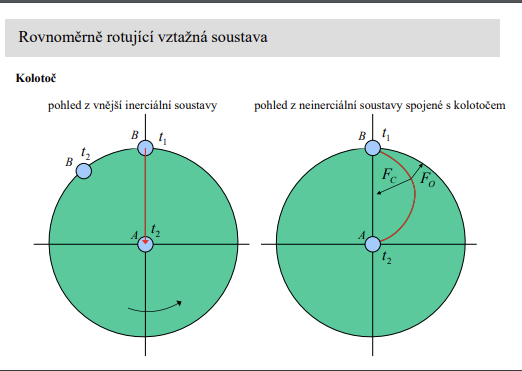
V druhé soustavě to nevypadá, jako by se kolotoč otáčel, protože je k němu vztažená soustava
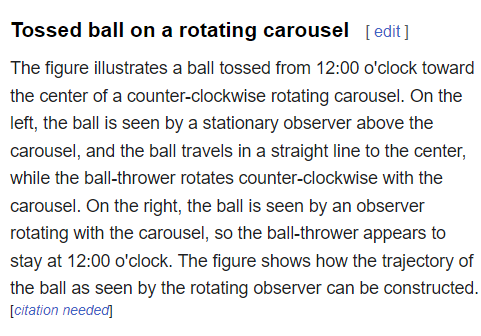

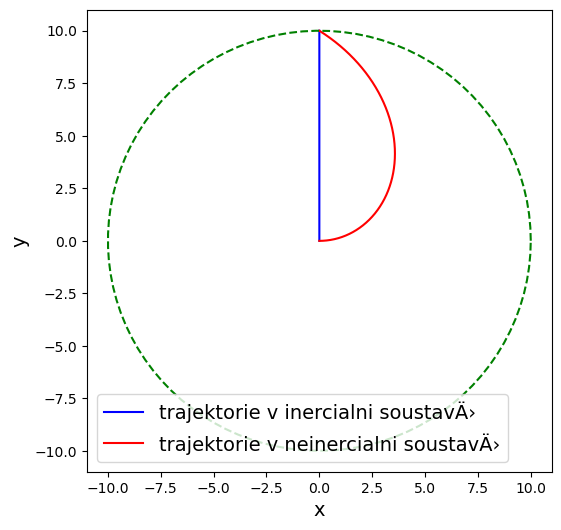

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tmax=1
dt=0.0001
omega=2*np.pi #uhlova rychlost otaceni
t=np.arange(0,tmax,dt)
#soradnice v necarkovane soustave
x=np.empty(np.size(t))
y=np.empty(np.size(t))
#rychlosti v necarkovane soustave
vx=np.empty(np.size(t))
vy=np.empty(np.size(t))
#soradnice v carkovane soustave
xp=np.empty(np.size(t))
yp=np.empty(np.size(t))
#rychlosti v carkovane soustave
vxp=np.empty(np.size(t))
vyp=np.empty(np.size(t))
#pocatecni poloha v necarkovane soustave
x[0]=0
y[0]=10
#pocatecni rychlost v necarkovane soustave
vx[0]=0
vy[0]=-40
#pocatecni poloha v carkovane soustave
xp[0]=x[0]*np.cos(omega*t[0])+y[0]*np.sin(omega*t[0])
yp[0]=-x[0]*np.sin(omega*t[0])+y[0]*np.cos(omega*t[0])
#pocatecni rychlost v carkovane soustave
vxp[0]=yp[0]*omega+vx[0]*np.cos(omega*t[0])+vy[0]*np.sin(omega*t[0])
vyp[0]=-xp[0]*omega-vx[0]*np.sin(omega*t[0])+vy[0]*np.cos(omega*t[0])
imax=0
#numericke reseni pohybove rovnice
for i in range(np.size(t)-1):
    x[i+1]=x[i]+vx[i]*dt
    y[i+1]=y[i]+vy[i]*dt
    xp[i+1]=xp[i]+vxp[i]*dt
    yp[i+1]=yp[i]+vyp[i]*dt
    vx[i+1]=vx[i]
    vy[i+1]=vy[i]
    vxp[i+1]=vxp[i]+(omega**2*xp[i]+2*omega*vyp[i])*dt #odstrediva a Corriolisova sila
    vyp[i+1]=vyp[i]+(omega**2*yp[i]-2*omega*vxp[i])*dt #odstrediva a Corriolisova sila
    if xp[i+1]<0 and imax==0: #mic doletel do stredu kolotoce
        imax=i+1

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(x[0:imax],y[0:imax],c='blue',label='trajektorie v inercialni soustavÄ›')
ax.plot(xp[0:imax],yp[0:imax],c='red',label='trajektorie v neinercialni soustavÄ›')

phi=np.linspace(0,2*np.pi,100)
ax.plot(y[0]*np.cos(phi),y[0]*np.sin(phi),c='green',ls='dashed')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
plt.legend(fontsize=14)

        



# Coriolisovasíla
$$
a_{c} = -2 \omega \times v
$$
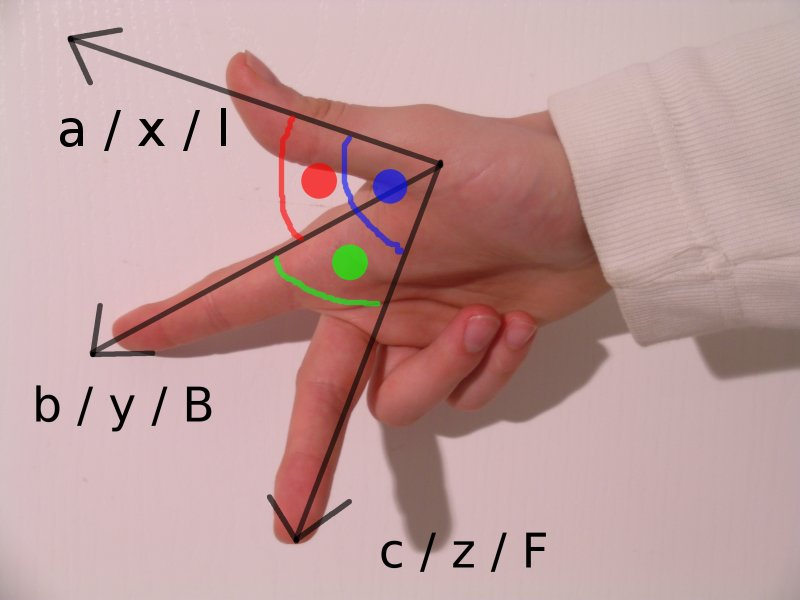
# Rossbyho číslo
Ukazuje, jak významná je Coroliosova síla
$$
R = \frac{v}{Lf}
$$
(v = rychlost, L charakteristický rozměr(vzdálenost), f = coriolosiva frekvence ($f = 2\omega sin(\phi)$ - $\omega$ je rychlost otáčení země a $\phi$ je zeměpisná šířka)
V meteorologii volíme rozující vztažnou soustavu, v níž země zůstává nehybná.

$$
R>>1 => odstředivá síla dominuje
$$

$$
R <<1 => dominuje Coriolosiva síla
$$

$$
R +- 1 => zanedbatelné
$$
Tornáda malé číslo, cyklóny velké

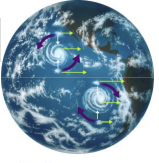

Když směřuje prst ven, tak se jedná o levotočivou soustavu, když do - Coriolosova síla je v důsledku rychlejšího otáčení blíže ke středu.


Text(0, 0.5, 'y')

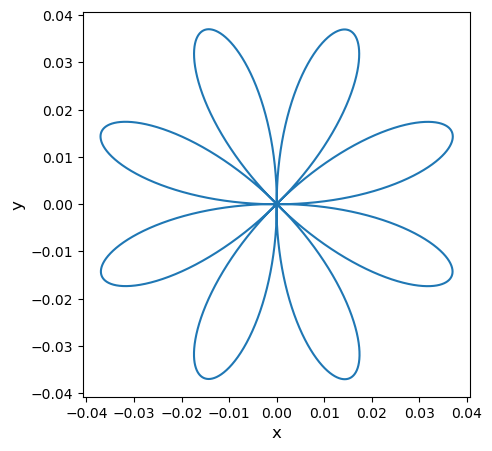

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T=1 #perioda otoceni Zeme
omega=2*np.pi/T #uhlova frekvence otaceni Zeme
dt=T/100000
m=1 #hmotnost zavazi
Tk=T/4#perioda kmitu 
k=(2*np.pi)**2*m/Tk**2 #tuhost pruziny
t=np.arange(0,T,dt)
x=np.zeros(np.size(t))
y=np.zeros(np.size(t))
vx=np.zeros(np.size(t))
vy=np.zeros(np.size(t))

#pocatecni podminky
x[0]=0
y[0]=0
vx[0]=0
vy[0]=1


for i in range(np.size(t)-1):
    x[i+1]=x[i]+vx[i]*dt
    y[i+1]=y[i]+vy[i]*dt
    vx[i+1]=vx[i]+(omega**2*x[i]+2*omega*vy[i]-k/m*x[i])*dt
    vy[i+1]=vy[i]+(omega**2*y[i]-2*omega*vx[i]-k/m*y[i])*dt


fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,y)    
ax.set_xlabel('x',fontsize=12)
ax.set_ylabel('y',fontsize=12)
